# Confidence Intervals

### Motivation

The idea that we can provide an  interval, not just a single estimate, will help us gain confidence in our ability to "capture" a population parameter is at the core of confidence intervals. The wider our interval the more confident we can be that we capture our parameter of interest.

How do we use sampling distributions to infer where a parameter is located for populations?

Once we have a sampling distribution, we can exclude certain values to a desired threshold. For example, by cutting off 2.5% of the values on either side of a normal distribution, we can say we are 95% sure the value is between said values.

(See OneNote notes for additional examples.)

In [12]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coffee_full = pd.read_csv('./Data/coffee_dataset.csv')
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


Image we have a population of coffee drinkers now defined by `coffee_full`. However, imagine we also only have access to a sample now defined by `coffee_red`. We can use this sample to build confidence intervals regarding out population.

In [3]:
coffee_red = coffee_full.sample(200)
coffee_red.head()

,user_id,age,drinks_coffee,height
2922,6734,<21,True,64.203511
2025,6017,>=21,True,67.619064
2263,2043,<21,True,63.233186
1837,6637,>=21,True,65.227304
1166,5541,<21,False,64.470727


In [4]:
print('Coffee_red shape: ', coffee_red.shape)
print('Coffee_full shape: ', coffee_full.shape)
print('Coffee_red drinks coffee: ', coffee_red.drinks_coffee.mean())
print('Coffee_red average height of coffee drinkers: ', coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean())

Coffee_red shape:  (200, 4)
Coffee_full shape:  (2974, 4)
Coffee_red drinks coffee:  0.595
Coffee_red average height of cofee drinkers:  68.19288934790764


Now let's use bootstrapping to take obtain a sampling distribution of the mean for the height of coffee drinkers.

(array([  15.,  132.,  634., 1680., 2739., 2655., 1506.,  510.,  114.,
          15.]),
 array([67.50006277, 67.640241  , 67.78041922, 67.92059744, 68.06077566,
        68.20095388, 68.3411321 , 68.48131032, 68.62148854, 68.76166676,
        68.90184498]),
 <BarContainer object of 10 artists>)

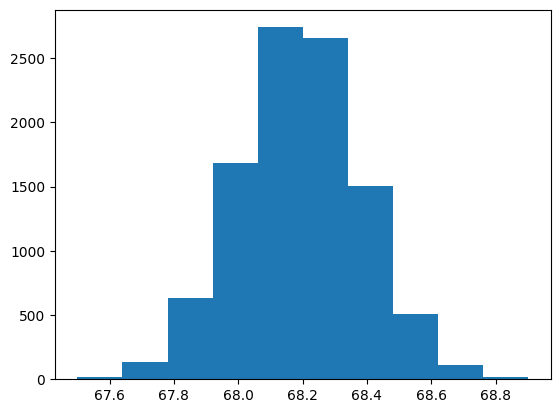

In [5]:
# SLOW!!!!
# bootstrap_height_means = [coffee_red.sample(200, replace=True).where(coffee_red['drinks_coffee'] == True)['height'].mean() for _ in range(10000)]
heights = coffee_red[coffee_red['drinks_coffee'] == True]['height'].values
bootstrap_height_means = np.random.choice(heights, size=(10000, 200), replace=True).mean(axis=1)
plt.hist(bootstrap_height_means)

In [6]:
np.percentile(bootstrap_height_means, 2.5), np.percentile(bootstrap_height_means, 97.5)

(67.8166348977483, 68.55946946153453)

We are 95% confident that the mean height of all coffee drinkers is between the above values, which is confirmed below.

In [7]:
coffee_full[coffee_full['drinks_coffee'] == True]['height'].mean()

68.40021025548381

##### Difference in Means

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

Average Height Diff: 1.831832715336
99% confidence interval: (1.1178767651131134, 2.55131026413113)
Min Height for Coffee Drinker: 67.47419540460317
Max Height for Person Who Doesn't Drink Cofee: 67.33641325348323


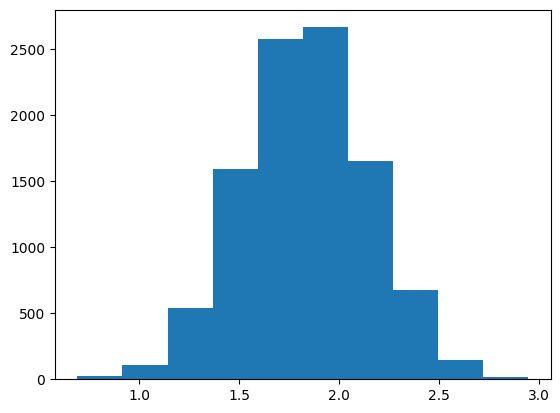

In [8]:
coffee_drinker_heights = heights # from above
non_coffe_drinker_heights = coffee_red[coffee_red['drinks_coffee'] == False]['height'].values
bootstrap_heights_coffee_drinker_means = np.random.choice(coffee_drinker_heights, (10000, 200), replace=True).mean(axis=1)
bootstrap_heights_non_coffee_drinker_means = np.random.choice(non_coffe_drinker_heights, (10000, 200), replace=True).mean(axis=1)
diffs =  bootstrap_heights_coffee_drinker_means - bootstrap_heights_non_coffee_drinker_means
plt.hist(diffs)
print('Average Height Diff:', diffs.mean())
print('99% confidence interval:', (np.percentile(diffs, 1), np.percentile(diffs, 99)))
print('Min Height for Coffee Drinker:', bootstrap_heights_coffee_drinker_means.min())
print('Max Height for Person Who Doesn\'t Drink Cofee:', bootstrap_heights_non_coffee_drinker_means.max())


This suggests, on average, coffee drinkers are larger than non-coffee drinkers. However, there are some bootstrapped samples consisting of those that do not drink coffee with a larger average height than those who do drink coffee.

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [9]:
heights_age_less_than_21 = coffee_red[coffee_red['age'] == "<21"]['height'].values
heights_age_greater_or_equal_21 = coffee_red[coffee_red['age'] == ">=21"]['height'].values

bootstrap_heights_lt_21_means = np.random.choice(heights_age_less_than_21, (10000, 200), replace=True).mean(axis=1)
bootstrap_heights_gte_21_means = np.random.choice(heights_age_greater_or_equal_21, (10000, 200), replace=True).mean(axis=1)

diffs = bootstrap_heights_gte_21_means-bootstrap_heights_lt_21_means
print('Average Height Difference between Ages <21 and >=21:', diffs.mean())
print('99% confidence interval:', (np.percentile(diffs, 1), np.percentile(diffs, 99)))
print('Min Average Height with Age >= 21:', bootstrap_heights_gte_21_means.min())
print('Max Average Height with Age < 21:', bootstrap_heights_lt_21_means.max())

Average Height Difference between Ages <21 and >=21: 3.707219381493417
99% confidence interval: (3.0954829488114797, 4.318291379903554)
Min Average Height with Age >= 21: 68.59478209682167
Max Average Height with Age < 21: 66.28675382654166


This suggests, on average, the height of those 21 years and older is larger than that of those under 21. In fact, none of the bootstrapped samples have a max average height greater than the minimum average height for those over 21.

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

Average Height Difference between Coffee and Non-Coffee Drinkers Under 21: -1.7172022096154476
95% confidence interval: (-2.199306553949001, -1.2312449976337942)


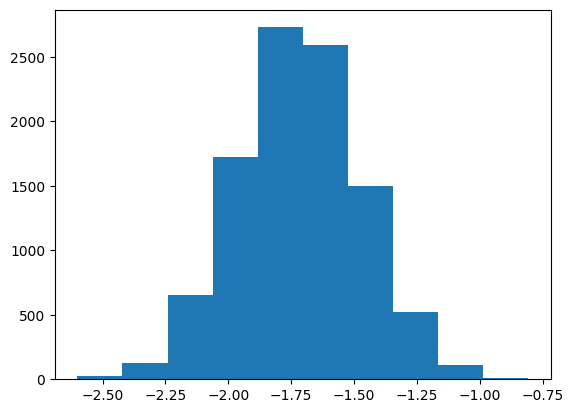

In [10]:
heights_coffee_lt_21 = coffee_red[(coffee_red['age'] == "<21") & (coffee_red['drinks_coffee'] == True)]['height'].values
heights_non_coffee_lt_21 = coffee_red[(coffee_red['age'] == "<21") & (coffee_red['drinks_coffee'] == False)]['height'].values

bootstrap_heights_coffee_lt_21_means = np.random.choice(heights_coffee_lt_21, (10000, 200), replace=True).mean(axis=1)
bootstrap_heights_non_coffee_lt_21_means = np.random.choice(heights_non_coffee_lt_21, (10000, 200), replace=True).mean(axis=1)

diffs = bootstrap_heights_coffee_lt_21_means-bootstrap_heights_non_coffee_lt_21_means
plt.hist(diffs)
print('Average Height Difference between Coffee and Non-Coffee Drinkers Under 21:', diffs.mean())
print('95% confidence interval:', (np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)))

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

Average Height Difference between Coffee and Non-Coffee Drinkers Under 21: -1.2831049198299438
95% confidence interval: (-1.679860315029406, -0.8937815722446761)


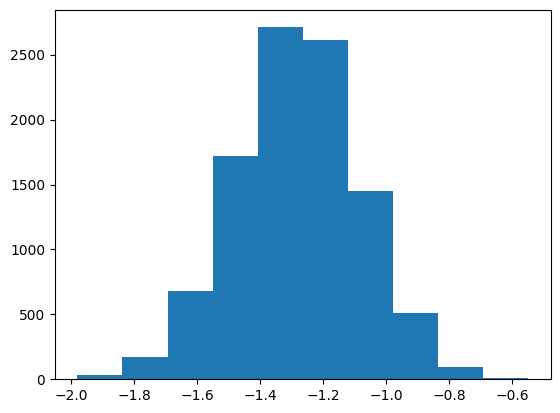

In [11]:
heights_coffee_gte_21 = coffee_red[(coffee_red['age'] == ">=21") & (coffee_red['drinks_coffee'] == True)]['height'].values
heights_non_coffee_gte_21 = coffee_red[(coffee_red['age'] == ">=21") & (coffee_red['drinks_coffee'] == False)]['height'].values

bootstrap_heights_coffee_gte_21_means = np.random.choice(heights_coffee_gte_21, (10000, 200), replace=True).mean(axis=1)
bootstrap_heights_non_coffee_gte_21_means = np.random.choice(heights_non_coffee_gte_21, (10000, 200), replace=True).mean(axis=1)

diffs = bootstrap_heights_coffee_gte_21_means-bootstrap_heights_non_coffee_gte_21_means
plt.hist(diffs)
print('Average Height Difference between Coffee and Non-Coffee Drinkers Under 21:', diffs.mean())
print('95% confidence interval:', (np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)))

### Practical vs Statistical Significance

**Statistical Significance** is evidence from hypothesis tests and confidence intervals that your hypothesis, $H_1$, is true.  
**Practical Significance** considers real world constraints, not just statistical significance, in making final conclusions. Considerations could include costs, time, or space.

### Traditional Methods or Bootstrapping

With large sample sizes, traditional methods for computing confidence intervals and bootstrapping tend to produce very similar results. With smaller sample sizes, traditional methods likely have assumptions that are not true of your interval. Small sample sizes are not ideal for bootstrapping methods either though, as they can lead to misleading results simply due to the sample not being representative of the population.

### Other Language Associated with Confidence Intervals

##### Political Example

In a political campaign, you might often see something like $$\text{Candidate A has }34\text{\% of the vote}\pm 3{\%}$$ $$\text{Candidate B has }22\text{\% of the vote}\pm 3{\%}$$ based on a 95% confidence interval. The $\pm$ 3% is considered the *margin of error*. By adding and subtracting the margin of error from the statistic measured, we can obtain the confidence interval. $$\text{Candidate A has }34\text{\% of the vote}\pm 3\%\left(31\%-37\%\right)$$ $$\text{Candidate B has }22\text{\% of the vote}\pm 3\%\left(19\%-25\%\right)$$

##### Relationship between Sample Size, Confidence Interval, and Confidence Level

Assuming we control for all other items of our analysis:

1. Increasing your sample size will decrease the width of your confidence interval. (Law of Large Numbers)
1. Increasing your confidence level (say 95% to 99%) will increase the width of our confidence interval.

We can compute:

1. The confidence interval width as the difference between the upper and lower bounds of the confidence interval.
1. The margin of error as half the confidence interval width and is the value you add and subtract from your sample estimate to achieve your confidence interval final result.

##### Confidence Intervals (& Hypothesis Testing) vs Machine Learning

Remember that confidence intervals are aimed at a single numeric value in our population. The values include the population mean, population standard deviation, difference between two population means, or any other numeric summary in the population.

Confidence intervals do not tell us anything about any specific individual data point. Confidence intervals take an aggregate approach towards the conclusions made on data and are aimed at understanding population parameters.

Alternatively, machine learning techniques take an individual approach toward making conclusions, as they attempt to predict an outcome for each specific data point.